In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import os

In [2]:
os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords')
folders = os.listdir()
for x in folders: exec(x + ' = pd.DataFrame()')
    
os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t0')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t0 = t0.append(df_temp)
    df_temp = [] 
t0 = t0.drop(['Unnamed: 0'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t1')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t1 = t1.append(df_temp)
    df_temp = []
t1 = t1.drop(['Unnamed: 0'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t2')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t2 = t2.append(df_temp)
    df_temp = []
t2 = t2.drop(['Unnamed: 0'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t3')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t3 = t3.append(df_temp)
    df_temp = []
t3 = t3.drop(['Unnamed: 0'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t4')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t4 = t4.append(df_temp)
    df_temp = []
t4 = t4.drop(['Unnamed: 0'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t5')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t5 = t5.append(df_temp)
    df_temp = []
t5 = t5.drop(['Unnamed: 0'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t6')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t6 = t6.append(df_temp)
    df_temp = []
t6 = t6.drop(['Unnamed: 0'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t7')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t7 = t7.append(df_temp)
    df_temp = []
t7 = t7.drop(['Unnamed: 0'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t8')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t8 = t8.append(df_temp)
    df_temp = []
t8 = t8.drop(['Unnamed: 0'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\keywords\\t9')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t9 = t9.append(df_temp)
    df_temp = []
t9 = t9.drop(['Unnamed: 0'], axis=1)

result = t0.append([t1,t2,t3,t4,t5,t6,t7,t8,t9])
result.dropna(subset = ["count"], inplace=True)
result.reset_index(level=0, inplace=True)
result = result.drop('index', axis=1)

In [3]:
result.columns = result.columns.str.replace(r" ", "_")
result.isnull().sum()

text               0
relevance          0
count              0
sentiment_score    0
sentiment_label    0
date               0
dtype: int64

In [4]:
result['text'] = result['text'].str.replace('#','')
result['text'] = result['text'].str.replace('【','')
result['text'] = result['text'].str.replace('】','')
result['text'] = result['text'].str.replace('／','')
result['text'] = result['text'].str.replace('（','')
result['text'] = result['text'].str.replace('）','')
result['text'] = result['text'].str.replace('　','')
result['text'] = result['text'].str.replace(' ','')
result['text'] = result['text'].str.replace('#','')
result['text'] = result['text'].str.replace('〜','')
result['text'] = result['text'].str.replace('＜','')
result['text'] = result['text'].str.replace('＞','')
result['text'] = result['text'].str.replace('％','')
result['text'] = result['text'].str.replace('＃','')

# We won't be using Emojis as part of our analysis, so we delete them here.
To_remove = ['👉','💫','👏🏻','👏','😭','🎉','🤣',
             '😅','💦','🍻','😍','❤️','🦀','🐘',
             '🏆','🌟','😆','👍','🎵','🎷','🎶',
             '🥁','🦠','💕','👋','📣','🌸','🎯',
             '😁','👍','⚠️','😃','❗️','💙','💿',
             '🙇‍','🙇‍♀️','🥟','🥺','🌺','💕','🐴',
             '💡','📢','🔥','😊','🤛','😂','🤭','✌️',
             '❣️','⭐️','🍚','💐','㊗️','🎊','🔁','👑',
             '🍀', '🎂', '💛', '💜', '😡',
             '日目','回目','枚目','さん','号店','歳児',
             '位','回話','名様','名さま','m','￣Y']
for i in To_remove:
    result['text'] = result['text'].str.replace(i,'')

In [5]:
def merge_keywords(row):
    if 'コロナ' in row['text'] or '肺炎' in row['text'] or '新型ウイルス' in row['text']:
        val = '新型コロナウイルス'    
    elif '中国' in row['text']:
        val = '中国'      
    elif '武漢' in row['text'] or '湖北' in row['text']:
        val = '武漢'
    elif '香港' in row['text']:
        val = '香港'
    elif 'マスク' in row['text']:
        val = 'マスク'        
    elif 'ワクチン' in row['text']:
        val = 'ワクチン'
    
    elif 'プレゼント' in row['text'] or '🧧' in row['text'] or '🎁' in row['text']:
        val = 'プレゼント'   
    elif 'クリスマス' in row['text'] or 'Xmas' in row['text'] or '🎅' in row['text'] or '🎄' in row['text']:
        val = 'クリスマス'
        
    elif 'キャンペーン' in row['text']:
        val = 'キャンペーン'         
    elif 'RT' in row['text']:
        val = 'RT'                   
    elif 'フォロー' in row['text']:
        val = 'フォロー' 
    elif 'フォロワー' in row['text']:
        val = 'フォロワー' 
        
    elif '応募' in row['text']:
        val = '応募'        
    elif '抽選' in row['text']:
        val = '抽選'                
    elif '締切' in row['text']:
        val = '締切'                
        
    elif '新年' in row['text'] or '元旦' in row['text'] or '新春' in row['text'] or '🎍' in row['text']:
        val = '新年'        
    elif '年越' in row['text']:
        val = '年越し'        
    elif '正月' in row['text']:
        val = '正月'        
    elif '年末' in row['text']:
        val = '年末'           

    elif 'ゴーン' in row['text']:
        val = 'ゴーン被告'   
    
    elif 'あつ森' in row['text'] or 'ぶつの森' in row['text']:
        val = 'どうぶつの森'  
        
    elif 'おつかれ' in row['text']:
        val = 'おつかれ'          
    elif 'お願い' in row['text']:
        val = 'お願い'          
    elif 'ご苦労' in row['text']:
        val = 'ご苦労'  
        
    elif 'ももクロ' in row['text']:
        val = 'ももクロ'  
    elif '嵐' in row['text'] or 'ARASHI' in row['text']:
        val = '嵐'  
    elif '相葉' in row['text']:
        val = '相葉雅紀'  
    elif '翔' in row['text'] or '櫻井' in row['text']:
        val = '櫻井翔'          
    elif '松本潤' in row['text']:
        val = '松本潤'  
    elif '二宮和也' in row['text'] or '二宮' in row['text']:
        val = '二宮和也'  
    elif '大野智' in row['text'] or '大ちゃん' in row['text']:
        val = '大野智'  
    elif '香取慎吾' in row['text'] or '大ちゃん' in row['text']:
        val = '香取慎吾'     

    elif '菅官房長官' in row['text'] or '菅氏' in row['text'] or '菅義偉' in row['text']:
        val = '菅義偉'
    elif '安倍' in row['text']:
        val = '安倍'    
    elif '紅白' in row['text']:
        val = '紅白'              
        
    elif '鬼滅' in row['text']:
        val = '鬼滅'   
    elif '炭治郎' in row['text']:
        val = '炭治郎'   
    
    elif 'センター' in row['text'] or 'センター試験' in row['text']:
        val = 'センター試験'   
        
    elif 'ポケットモンスター' in row['text'] or 'ポケモン' in row['text']:
        val = 'ポケモン'         
    elif '麒麟' in row['text']:
        val = '麒麟'  

    elif '毎日挑戦' in row['text']:
        val = '毎日挑戦'  
    elif 'チャレンジ' in row['text']:
        val = 'チャレンジ'
    elif 'チャンス' in row['text']:
        val = 'チャンス'   
    elif '再挑戦' in row['text']:
        val = '再挑戦'           
    
    elif '今日' in row['text']:
        val = '今日'        
    elif 'ぶり' in row['text']:
        val = 'ぶり'  
    elif 'wPeing' in row['text']:
        val = 'Peing'  
    elif 'Д' in row['text'] or 'д' in row['text'] :
        val = '゜Д゜' 
        
    elif '大輔' in row['text'] or '高橋大輔' in row['text']:
        val = '高橋大輔'  
    elif '菅田将暉' in row['text'] or '菅田くん' in row['text']:
        val = '菅田将暉'  
    elif '環奈' in row['text']:
        val = '橋本環奈'  
    elif 'ツイート数' in row['text']:
        val = 'ツイート数' 
    elif '発売' in row['text']:
        val = '発売'          
    elif 'Mステ' in row['text']:
        val = 'Mステ'    
    elif 'お誕生日' in row['text']:
        val = '誕生日' 
    elif 'Amazonギフト券' in row['text'] or 'Amazonギフト' in row['text']:
        val = 'Amazonギフト券'
    elif 'オリンピック' in row['text']:
        val = 'オリンピック'
    elif 'ω' in row['text'] or '꒳' in row['text']:
        val = 'ω'        
    
    elif row['text']=='年1月':
        val = '1月'  
    elif row['text']=='年2月':
        val = '2月' 
    elif row['text']=='年3月':
        val = '3月' 
    elif row['text']=='年4月':
        val = '4月' 
    elif row['text']=='年12月':
        val = '12月'                        
    elif row['text']=='日午後':
        val = '午後'  
        
    else:
        val = row['text']
    return val


result['text'] = result.apply(merge_keywords, axis=1)

# 1 Sentiment label

In [6]:
sentiment_label = pd.crosstab(result.sentiment_label,result.date).T
for x in sentiment_label:
    sentiment_label = sentiment_label.rename(columns={x: 'sentiment_label_count_'+x})

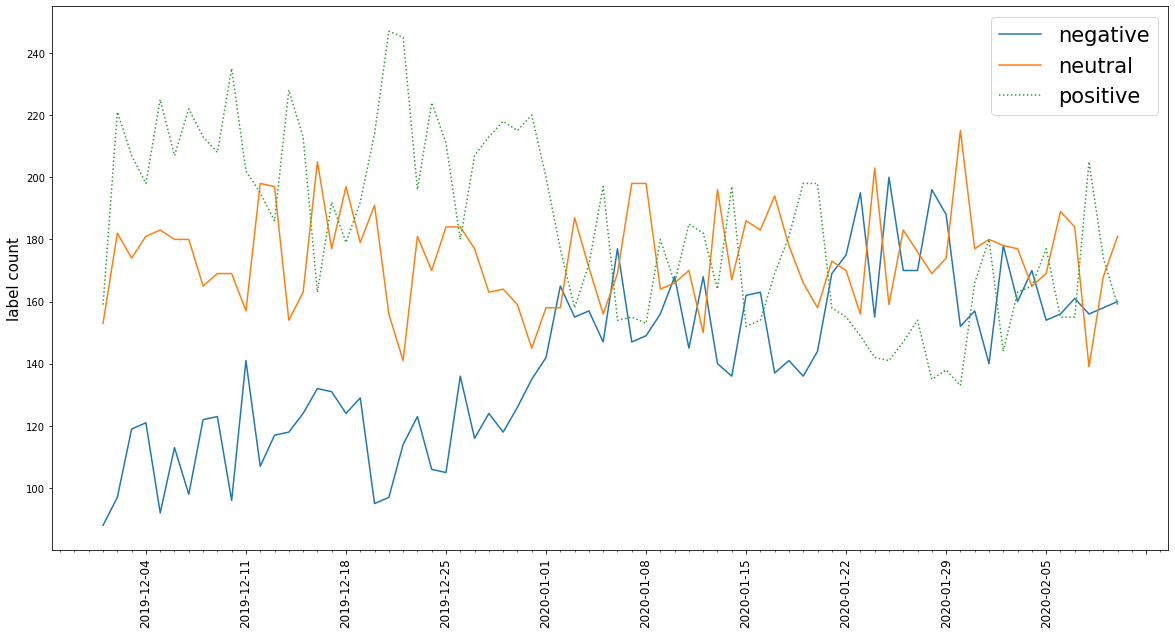

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(sentiment_label['sentiment_label_count_negative'], label = "negative")
plt.plot(sentiment_label['sentiment_label_count_neutral'], label = "neutral")
plt.plot(sentiment_label['sentiment_label_count_positive'], label = "positive", linestyle='dotted')

plt.ylabel('label count', size=15)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 2 Illustration for feature engineering (numeric to binary variables)

In [8]:
# Here, we calculate Q1 and Q3.
q1 = sentiment_label['sentiment_label_count_positive'].quantile(.25)
q3 = sentiment_label['sentiment_label_count_positive'].quantile(.75)
print(q1)
print(q3)

158.0
207.0


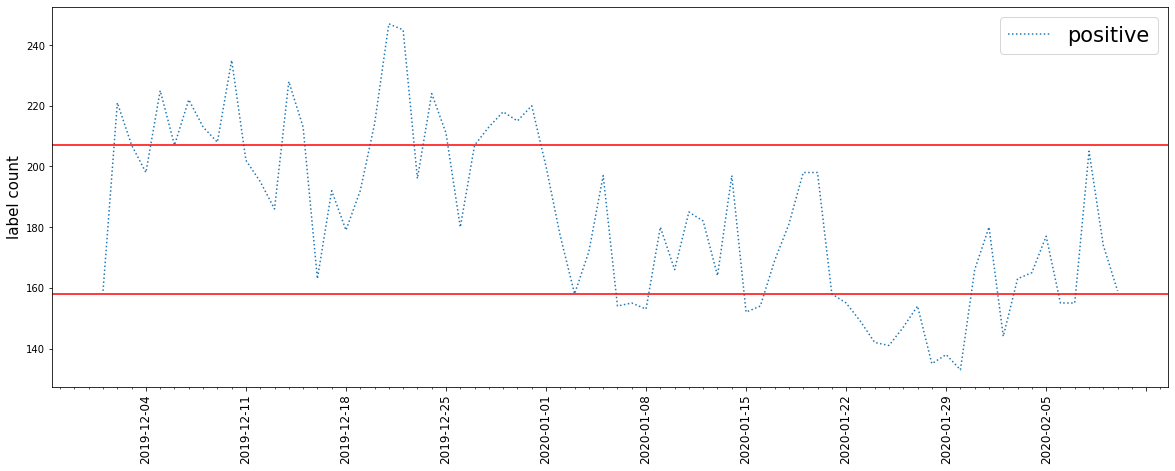

In [9]:
# We seperate the values according to Q1 and Q3.
fig, ax = plt.subplots(figsize=(20,7))

plt.plot(sentiment_label['sentiment_label_count_positive'], label = "positive", linestyle='dotted')
plt.axhline(y = 158, color = 'r', linestyle = '-')
plt.axhline(y = 207, color = 'r', linestyle = '-')

plt.ylabel('label count', size=15)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

In [10]:
# Here, we create 3 new columns for "high", "medium", and "low" values.
def high(row):
    if row['sentiment_label_count_positive'] >=207:
        val = 1
    else: 
        val = 0
    return val
def low(row):
    if row['sentiment_label_count_positive'] <=158:
        val = 1
    else: 
        val = 0
    return val
def meidum(row):
    if row['sentiment_label_count_positive'] >158 and row['sentiment_label_count_positive'] < 207:
        val = 1
    else: 
        val = 0
    return val
sentiment_label['high'] = sentiment_label.apply(high, axis=1)
sentiment_label['meidum'] = sentiment_label.apply(meidum, axis=1)
sentiment_label['low'] = sentiment_label.apply(low, axis=1)

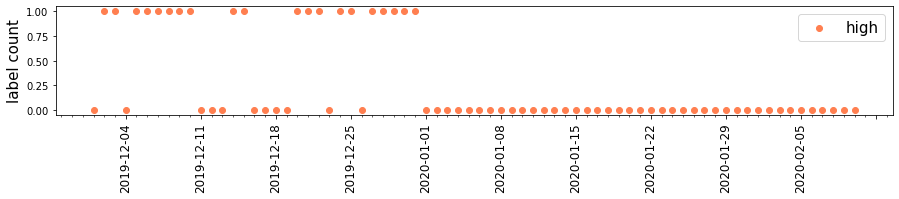

In [11]:
# Here, we plot three values.
fig, ax = plt.subplots(figsize=(15,2))

plt.scatter(sentiment_label.index, sentiment_label['high'], label = "high", c='coral')
plt.ylabel('label count', size=15)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 15})

fmt_month = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

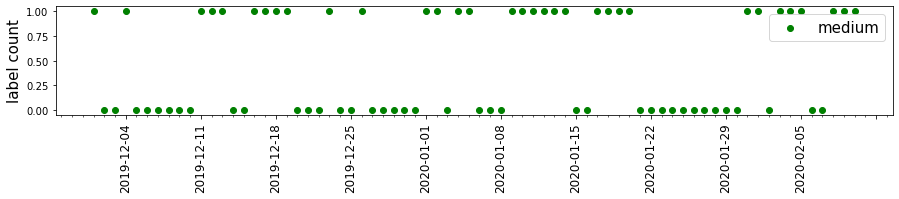

In [12]:
fig, ax = plt.subplots(figsize=(15,2))

plt.scatter(sentiment_label.index, sentiment_label['meidum'], label = "medium", c='g')
plt.ylabel('label count', size=15)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 15})

fmt_month = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

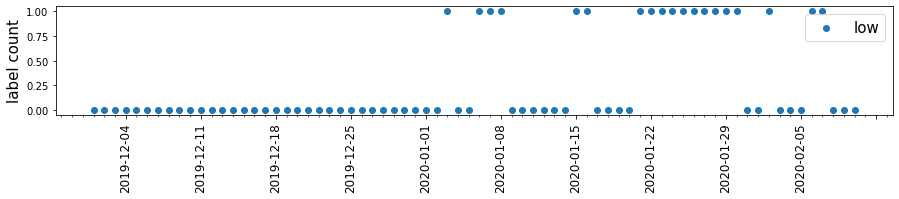

In [13]:
fig, ax = plt.subplots(figsize=(15,2))

plt.scatter(sentiment_label.index, sentiment_label['low'], label = "low")
plt.ylabel('label count', size=15)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 15})

fmt_month = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 3 Daily average sentiment score

In [14]:
# Here we calculate daily mean sentiment score.
sentiment_score = result.groupby('date').mean()['sentiment_score'].reset_index()
sentiment_score = sentiment_score.set_index('date')

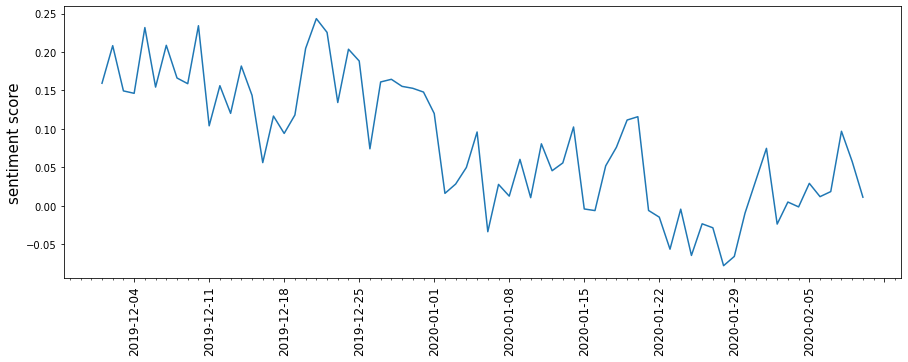

In [15]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(sentiment_score['sentiment_score'])
plt.xticks(rotation='vertical', size=12)
plt.ylabel('sentiment score', size=15)

fmt_month = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_month)

fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 4 Sentiment score of keywords

In [16]:
mean_score = pd.DataFrame(result.groupby(['date', 'text'])['sentiment_score'].sum())
mean_score = mean_score.unstack(level=0).T
mean_score.reset_index(level=0, inplace=True)
mean_score = mean_score.drop('level_0',axis=1)
mean_score.shape

(72, 22114)

In [17]:
# Delete columns containing either 95% or more NaN Values
perc = 95
min_count =  int(((100-perc)/100)*mean_score.shape[0] + 1)
mean_score = mean_score.dropna( axis=1, thresh=min_count)
mean_score.shape

(72, 582)

# 5 Compare COVID-related keywords and others 

In [18]:
# Here, we compare COVID-related words with others.
result = pd.get_dummies(result, columns=['sentiment_label'])
covid = result.loc[result['text'] == '新型コロナウイルス']
china = result.loc[result['text'] == '中国']
wuhan = result.loc[result['text'] == '武漢']

In [19]:
result.sum()

text                        キャンペーンプレゼント応募フォロープレゼント12月キャンペーン本日外崎りんご応募ona_ag...
relevance                                                        18464.023352
count                                                                   53029
sentiment_score                                                   2955.385678
date                        2019-12-012019-12-012019-12-012019-12-012019-1...
sentiment_label_negative                                                10142
sentiment_label_neutral                                                 12536
sentiment_label_positive                                                13222
dtype: object

In [20]:
covid.sum()

text                        新型コロナウイルス新型コロナウイルス新型コロナウイルス新型コロナウイルス新型コロナウイルス新...
relevance                                                           110.26867
count                                                                     285
sentiment_score                                                    -40.294238
date                        2020-01-152020-01-242020-01-252020-01-252020-0...
sentiment_label_negative                                                   97
sentiment_label_neutral                                                    69
sentiment_label_positive                                                   48
dtype: object

In [21]:
china.sum()

text                        中国中国中国中国中国中国中国中国中国中国中国中国中国中国中国中国中国中国中国中国中国中国中国...
relevance                                                           51.201449
count                                                                     106
sentiment_score                                                    -22.018425
date                        2019-12-232019-12-252019-12-302019-12-302019-1...
sentiment_label_negative                                                   43
sentiment_label_neutral                                                    43
sentiment_label_positive                                                   14
dtype: object

In [22]:
wuhan.sum()

text                        武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢武漢...
relevance                                                           18.024809
count                                                                      42
sentiment_score                                                      -5.46805
date                        2020-02-082020-01-252020-01-262020-01-282020-0...
sentiment_label_negative                                                   15
sentiment_label_neutral                                                    14
sentiment_label_positive                                                    6
dtype: object

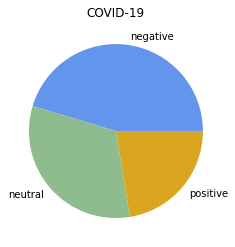

In [23]:
# Here we use pie charts to illustrate the numbers of sentiment labels for each key word.

# This is a pie chart for "新型コロナウイルス(COVID-19)"
y = np.array([97, 69, 48])
mylabels = ["negative", "neutral", "positive"]
mycolors = ["CornflowerBlue", "DarkSeaGreen",'GoldenRod']
plt.title('COVID-19')
plt.pie(y, labels = mylabels, colors = mycolors)
plt.show()

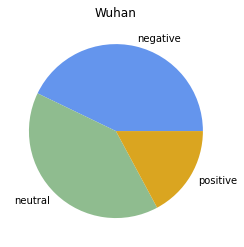

In [24]:
# This is a pie chart for "武漢(Wuhan)"
y = np.array([15, 14, 6])
mylabels = ["negative", "neutral", "positive"]
mycolors = ["CornflowerBlue", "DarkSeaGreen",'GoldenRod']
plt.title('Wuhan')
plt.pie(y, labels = mylabels, colors = mycolors)
plt.show()

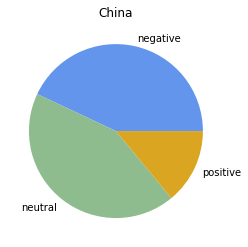

In [25]:
# This is a pie chart for "中国(China)"
y = np.array([43, 43, 14])
mylabels = ["negative", "neutral", "positive"]
mycolors = ["CornflowerBlue", "DarkSeaGreen",'GoldenRod']
plt.title('China')
plt.pie(y, labels = mylabels, colors = mycolors)
plt.show()

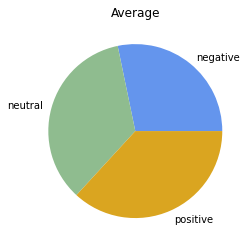

In [26]:
# This is a pie chart of sum of all keywords labels. 
y = np.array([10142, 12536, 13222])
mylabels = ["negative", "neutral", "positive"]
mycolors = ["CornflowerBlue", "DarkSeaGreen",'GoldenRod']
plt.title('Average')
plt.pie(y, labels = mylabels, colors = mycolors)
plt.show()

# 6 Word Cloud

In [27]:
# First, we create a dataframe for word clouds.

cloud = pd.DataFrame(result.groupby(['date', 'text'])['count'].sum())
cloud = cloud.unstack(level=0).T
cloud.reset_index(level=0, inplace=True)
cloud = cloud.drop('level_0',axis=1)
cloud = cloud.drop(['','お','ツ矢','ら'], axis=1) # remove some words that do not make sense.

cloud_before = cloud.iloc[:46,:].T
cloud_after = cloud.iloc[46:,:].T

cloud_before["sum"] = cloud_before.sum(axis=1)
cloud_after["sum"] = cloud_after.sum(axis=1)

cloud_before = pd.DataFrame(cloud_before.iloc[: , -1])
cloud_after = pd.DataFrame(cloud_after.iloc[: , -1])

cloud_before = cloud_before[(cloud_before.T != 0).any()]
cloud_after = cloud_after[(cloud_after.T != 0).any()]

cloud_before = cloud_before.sort_values(by='sum', ascending=False)
cloud_after = cloud_after.sort_values(by='sum', ascending=False)

cloud_before = cloud_before.reset_index()
cloud_after = cloud_after.reset_index()

In [33]:
# Here we set up for word clouds. 
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 6000,
    height = 4000,repeat=False,
    background_color = 'white')
word_to_frequency=None

In [41]:
# After running this, a word cloud for "before 1st COVID case in Japan" would pop as jpg file.

list1 = cloud_before['text'].to_list()
list2 = cloud_before['sum'].to_list()
ser_before = pd.Series(list2, index =list1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis')
font_path = 'NotoSansJP-Regular.otf'
wordcloud = WordCloud(width=4000, height=1500,background_color="white", 
                      font_path=font_path).generate_from_frequencies(ser_before)
image = wordcloud.to_image()
image.show()

# The word cloud is saved as jpg file.
os.chdir('C:\\Users\\alexx\\Documents\\thesis\\processed data')
image.save("before.jpg") 

In [42]:
# After running this, a word cloud for "after 1st COVID case in Japan" would pop as jpg file.

list3 = cloud_after['text'].to_list()
list4 = cloud_after['sum'].to_list()
ser_after = pd.Series(list4, index =list3)

os.chdir('C:\\Users\\alexx\\Documents\\thesis')
font_path = 'NotoSansJP-Regular.otf'
wordcloud = WordCloud(width=4000, height=1500,background_color="white", 
                      font_path=font_path).generate_from_frequencies(ser_after)
image = wordcloud.to_image()
image.show()

# The word cloud is saved as jpg file.
os.chdir('C:\\Users\\alexx\\Documents\\thesis\\processed data')
image.save("after.jpg") 